In [1]:
%%capture
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from processing import process_embedding_from_words
from taxonomy import (phi_edge, build_state, proba_state, TaxonomyModule,
                    plot_state_likelihood_and_gradient, plot_nx_graph)

%load_ext autoreload
%autoreload 2

In [2]:
# Training data

""" train_words = [
    "vertebrate", "mammal", "placental", "cow", "rodent", "rat", "metatherian",
    "marsupial", "kangaroo", "reptile", "diapsid", "squirrel", "snake",
    "crocodilian", "anapsid", "chelonian", "turtle"
] """


# Curated
train_words = [
    "vertebrate", "mammal", "placental", "cow", "rodent", "rat",
    "marsupial", "kangaroo", "reptile", "diapsid", "squirrel", "snake",
    "crocodilian", "turtle"
]

In [3]:
train_df_graph = pd.DataFrame(index=train_words, columns=train_words)

train_df_graph.loc["vertebrate", "mammal"] = 1
train_df_graph.loc["vertebrate", "reptile"] = 1
train_df_graph.loc["mammal", "placental"] = 1
# train_df_graph.loc["mammal", "metatherian"] = 1
train_df_graph.loc["placental", "cow"] = 1
train_df_graph.loc["placental", "rodent"] = 1
train_df_graph.loc["rodent", "squirrel"] = 1
train_df_graph.loc["rodent", "rat"] = 1
# train_df_graph.loc["metatherian", "marsupial"] = 1
train_df_graph.loc["marsupial", "kangaroo"] = 1
train_df_graph.loc["reptile", "diapsid"] = 1
# train_df_graph.loc["reptile", "anapsid"] = 1
train_df_graph.loc["diapsid", "snake"] = 1
train_df_graph.loc["diapsid", "crocodilian"] = 1
# train_df_graph.loc["anapsid", "chelonian"] = 1
# train_df_graph.loc["chelonian", "turtle"] = 1

# Correction
train_df_graph.loc["reptile", "turtle"] = 1
train_df_graph.loc["mammal", "marsupial"] = 1

train_df_graph = train_df_graph.fillna(0)
# train_df_graph.head()

In [4]:
train_embedd = process_embedding_from_words(train_words)

In [5]:
w = np.random.randn(train_embedd.shape[-1])
phi_edge(0, 1, w, train_embedd, y=1), phi_edge(0, 1, w, train_embedd, y=0)

(1.8161306436169567e-06, 1)

In [6]:
w = np.random.randn(train_embedd.shape[-1])
train_state = build_state(train_words, train_df_graph)
proba_state(w, train_state, train_words, train_embedd)

-107.41725414807833

In [7]:
dim_embedding = train_embedd.shape[-1]
proba_state(np.zeros(dim_embedding), train_state, train_words, train_embedd), (len(train_words)**2 - len(train_words))*np.log(0.5)

(-126.15278686191026, -126.15278686191004)

### Plots


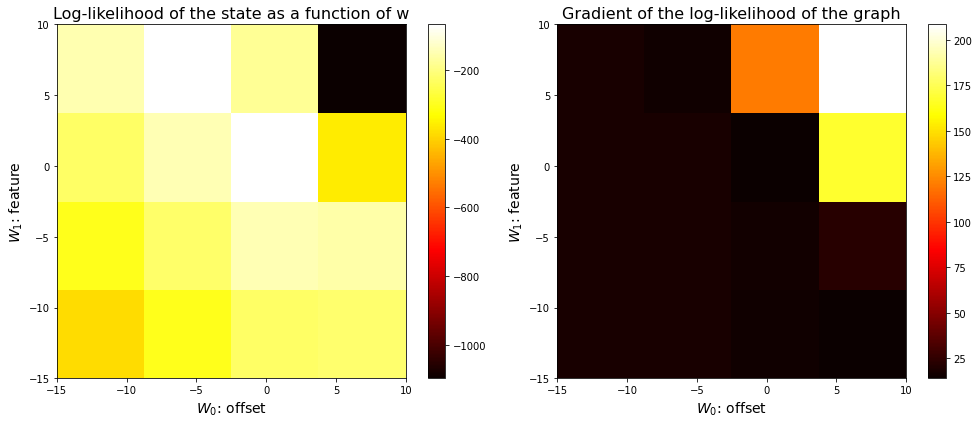

In [8]:
W_X, W_Y = np.meshgrid(np.linspace(-15, 10, 5), np.linspace(-15, 10, 5))

plot_state_likelihood_and_gradient(
    train_state, train_words, train_embedd, W_X, W_Y)

## Visualization

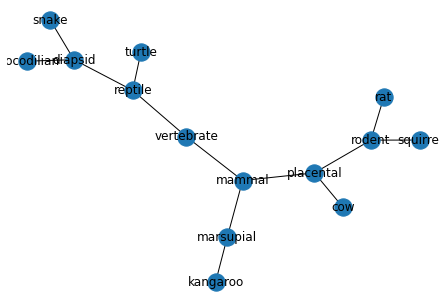

In [9]:
ground_truth = np.array([
    np.ones((train_df_graph.shape[0], train_df_graph.shape[1])),
    train_df_graph]).transpose(1, 2, 0)
plot_nx_graph(w=np.array([-3, 6]), words=train_words, embedding=ground_truth);

### Training procedure

In [10]:
taxonomy_module = TaxonomyModule(nb_features=103)

In [11]:
# NeverGrad
taxonomy_module.train(train_df_graph, nb_epochs=500, lr=None, bal_coef=5, verbose=False)

(8_w,17)-aCMA-ES (mu_w=5.1,w_1=31%) in dimension 103 (seed=nan, Mon Mar  8 21:31:08 2021)


In [12]:
# Gradient Descent
nb_epochs = 10
lr = 0.001
taxonomy_module.train(train_df_graph, nb_epochs, lr=lr, bal_coef=5, verbose=True)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

[Epoch 1]: -147.22


  0%|          | 0/103 [00:00<?, ?it/s]

[Epoch 2]: -135.26


  0%|          | 0/103 [00:00<?, ?it/s]

[Epoch 3]: -132.97


  0%|          | 0/103 [00:00<?, ?it/s]

[Epoch 4]: -131.46


  0%|          | 0/103 [00:00<?, ?it/s]

[Epoch 5]: -130.06


  0%|          | 0/103 [00:00<?, ?it/s]

[Epoch 6]: -128.74


  0%|          | 0/103 [00:00<?, ?it/s]

[Epoch 7]: -127.48


  0%|          | 0/103 [00:00<?, ?it/s]

[Epoch 8]: -126.27


  0%|          | 0/103 [00:00<?, ?it/s]

[Epoch 9]: -125.12


  0%|          | 0/103 [00:00<?, ?it/s]

[Epoch 10]: -124.02


In [13]:
taxonomy_module.f1_score(train_df_graph)

0.19999999607200006

V_vertebrate_mammal 0.4359796900283594
V_vertebrate_placental 0.9468369005040839
V_vertebrate_cow 0.5234175532270648
V_vertebrate_rodent 0.8170949264462035
V_vertebrate_rat 0.9441385369852324
V_vertebrate_marsupial 0.7535174329425904
V_vertebrate_kangaroo 0.7386455655139639
V_vertebrate_reptile 0.6394618805398136
V_vertebrate_diapsid 0.7809204943470331
V_vertebrate_squirrel 0.8355948186928602
V_vertebrate_snake 0.8134835132504253
V_vertebrate_crocodilian 0.48963809429098665
V_vertebrate_turtle 0.18386507989952874
V_mammal_vertebrate 0.21145196783687104
V_mammal_placental 0.8005643720400033
V_mammal_cow 0.19842010962684223
V_mammal_rodent 0.5017127672084566
V_mammal_rat 0.7920721386540394
V_mammal_marsupial 0.4079428678634245
V_mammal_kangaroo 0.38912394444853154
V_mammal_reptile 0.2855884175016971
V_mammal_diapsid 0.445492913782101
V_mammal_squirrel 0.533916073543183
V_mammal_snake 0.4957173889886517
V_mammal_crocodilian 0.17779033817231205
V_mammal_turtle 0.04832317058646025
V_placent

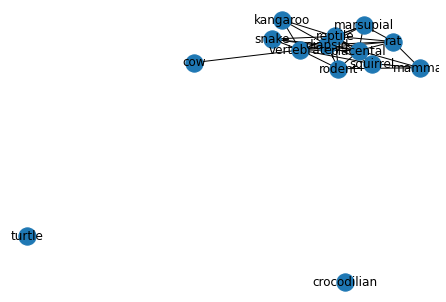

In [14]:
taxonomy_module.infer_graph(train_words, verbose=True);

In [12]:
%load_ext line_profiler

In [18]:
from taxonomy import gradient_from_w, proba_state, build_graph
from graph import Graph
%lprun -f Graph.__init__ taxonomy_module.train(train_df_graph, nb_epochs=1, lr=1e-3, bal_coef=5, verbose=False)

Timer unit: 1e-06 s

Total time: 31.8324 s
File: /home/clement/Desktop/taxonomy-project/graph.py
Function: __init__ at line 56

Line #      Hits         Time  Per Hit   % Time  Line Contents
    56                                               def __init__(self, dic_nodes, edge_names):
    57                                                   """
    58                                                   dic_nodes : dictionnary mapping the name of each node to the node.
    59                                                   edge_name : list containing the list of the form [node_name_1,node_name_2]
    60                                                               There is no need to put the nodes in both directions.
    61                                                   """
    62                                                   # We work with node NAMES and edge POINTERS
    63       104        326.0      3.1      0.0          self.dic_nodes = dic_nodes  # Maps names to nodes
    

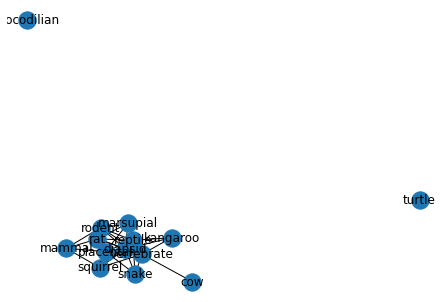

In [15]:
taxonomy_module.infer_graph(train_df_graph);

### Kirchhoff’s Matrix Tree Theorem (MTT)

In [14]:
from networkx.linalg.laplacianmatrix import laplacian_matrix
L_matrix = laplacian_matrix(G).todense()
nb_covering_trees = np.linalg.det(L_matrix[1:,1:])
nb_covering_trees

NameError: name 'G' is not defined

## Gensim Tests

In [3]:
import gensim.downloader as api
corpus = api.load('text8')
print(api.load('glove-wiki-gigaword-50', return_path=True))

[==================================================] 100.0% 31.6/31.6MB downloaded
[==================================================] 100.0% 66.0/66.0MB downloaded
C:\Users\charb/gensim-data\glove-wiki-gigaword-50\glove-wiki-gigaword-50.gz


In [9]:
model = api.load("glove-wiki-gigaword-50")

In [12]:
model.word_vec("cat").shape

(50,)